In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import csv
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import HashingVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
def read_data(csv_file):
    data =[]
    with open(csv_file, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        for row in reader:
            data.append(row)
    header = data[0]
    # Create DataFrame from the remaining rows (excluding the header row)
    df = pd.DataFrame(data[1:], columns=header)
    df.rename(columns={header[0]: 'Bookmark'}, inplace=True)
    return df

In [4]:
csv_file = "C:\\Users\\tkaly\\lucky\\Hands_on_pratice\\News_sentiment\\news_2024-02-12_16-14-41.csv"
df1 = read_data(csv_file)
df1.head()

,Bookmark,Datetime,Summary Sentiment,Headline,Summary,Source
0,No,2024-02-12 15:49:00,-0.99,"PSU banking stocks drag down Sensex, Nifty; an...",Analysts expect markets to observe consolidati...,Money Control
1,No,2024-02-12 15:49:00,-0.99,Mamaearth parent Honasa Consumer stock soars 1...,Analysts at JPMorgan downgraded the stock to '...,Money Control
2,No,2024-02-12 15:41:00,-0.99,Live: Nifty sees triple-digit fall; Smallcaps ...,PSU stocks come under pressure dragging the be...,Money Control
3,No,2024-02-12 15:36:00,-0.96,Bandhan Bank slumps over 7% as weak asset qual...,Release of claims under government guarantees ...,Money Control
4,No,2024-02-12 15:35:00,-0.97,Entero Healthcare Solutions IPO sees muted res...,The Faridabad-based healthcare products distri...,Money Control


In [5]:
csv_file = "C:\\Users\\tkaly\\lucky\\Hands_on_pratice\\News_sentiment\\news_2024-02-13_15-34-49.csv"
df2 = read_data(csv_file)
df2.head()

,Bookmark,Datetime,Summary Sentiment,Headline,Summary,Source
0,Yes,2024-02-13 15:20:00,0.88,Info Edge back in black in Q3 after a surprise...,The company’s consolidated revenue increased b...,Money Control
1,Yes,2024-02-13 15:19:00,0.94,Eicher Motors Q3 results: Net profit surges 34...,The automaker’s revenue increased 12.28 per ce...,Money Control
2,No,2024-02-13 15:09:43.029172,0.99,"“Very proud of our diaspora,” says PM Modi ahe...",The PM also emphasised that he looks forward t...,Zerodha
3,No,2024-02-13 15:08:00,0.9,Relative outperformer candidates for a volatil...,"On Monday, when the whole market was reeling u...",Economic Times
4,Yes,2024-02-13 15:02:00,-0.99,"Siemens Q3 net profit rises 9% to Rs 5,057 cro...",The company's EBITDA margin fell nearly 170 ba...,Money Control


In [6]:
csv_file = "C:\\Users\\tkaly\\lucky\\Hands_on_pratice\\News_sentiment\\news_2024-02-14_15-45-43.csv"
df3 = read_data(csv_file)
df3.head()

,Bookmark,Datetime,Summary Sentiment,Headline,Summary,Source
0,No,2024-02-14 15:31:00,-0.99,Paytm shares crash 10% to all-time lows as ED ...,"Since January 31, after the RBI imposed its re...",Money Control
1,No,2024-02-14 15:26:00,-0.99,Check vitals before admitting them in your por...,"In the last three days, including this morning...",Economic Times
2,No,2024-02-14 15:24:00,0.97,"Divergence between mid-, large-cap performance...",The Nifty Midcap Select index aims to track th...,Money Control
3,No,2024-02-14 15:20:00,-0.99,FPIs' investment value rises 13% to $738 bn in...,"However, FPIs' contribution to Indian equity m...",Economic Times
4,No,2024-02-14 15:16:00,0.98,"Majestic Rally! Rs 10,000 investment in RIL in...",It was in 2005 that RIL first hit the Rs 1 lak...,Economic Times


In [7]:
df4 = pd.concat([df1, df2], ignore_index=True)

In [8]:
Combined_df = pd.concat([df3, df4], ignore_index=True)

In [9]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(Combined_df.shape)

(326, 6)
(445, 6)
(411, 6)
(771, 6)
(1182, 6)


In [10]:
Combined_df.Datetime = pd.to_datetime(Combined_df['Datetime'])

In [11]:
Combined_df.isin(['', 'NA', 'NaN']).sum()

Bookmark              0
Datetime              0
Summary Sentiment     0
Headline              0
Summary              57
Source                0
dtype: int64

In [12]:
Combined_df['Summary'] = Combined_df.apply(lambda row: row['Headline'] if row['Summary'] == "" else row['Summary'], axis=1)

In [13]:
Combined_df.isin(['', 'NA', 'NaN']).sum()

Bookmark             0
Datetime             0
Summary Sentiment    0
Headline             0
Summary              0
Source               0
dtype: int64

In [14]:
Combined_df['Bookmark'] = Combined_df['Bookmark'].map({'No': 0, 'Yes': 1})

In [15]:
Combined_df

,Bookmark,Datetime,Summary Sentiment,Headline,Summary,Source
0,0,2024-02-14 15:31:00.000000,-0.99,Paytm shares crash 10% to all-time lows as ED ...,"Since January 31, after the RBI imposed its re...",Money Control
1,0,2024-02-14 15:26:00.000000,-0.99,Check vitals before admitting them in your por...,"In the last three days, including this morning...",Economic Times
2,0,2024-02-14 15:24:00.000000,0.97,"Divergence between mid-, large-cap performance...",The Nifty Midcap Select index aims to track th...,Money Control
3,0,2024-02-14 15:20:00.000000,-0.99,FPIs' investment value rises 13% to $738 bn in...,"However, FPIs' contribution to Indian equity m...",Economic Times
4,0,2024-02-14 15:16:00.000000,0.98,"Majestic Rally! Rs 10,000 investment in RIL in...",It was in 2005 that RIL first hit the Rs 1 lak...,Economic Times
...,...,...,...,...,...,...
1177,0,2024-02-12 16:00:43.030168,0.74,Airbus CEO Says Boeing 737 Max Blowout ‘Makes ...,Airbus SE Chief Executive Officer Guillaume Fa...,Zerodha
1178,0,2024-02-12 16:00:43.030168,0.98,Draft Guidelines For Notification Of Private A...,The formulation of draft guidelines for the no...,Zerodha
1179,0,2024-02-12 15:30:43.030168,0.52,OMCs in the last leg of the rally; like gas ut...,"Exuberance is observed in mid and smallcaps, w...",Zerodha
1180,0,2024-02-12 15:30:43.030168,-0.98,MSCI announcement tomorrow: $1 billion inflow ...,The MSCI inclusion can lead to about $ 186 mil...,Zerodha


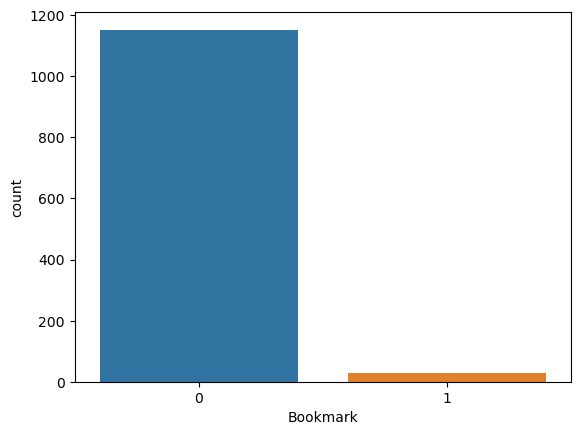

In [16]:
sns.countplot(x='Bookmark', data=Combined_df)
plt.show()

In [17]:
tfidf_vectorizer = TfidfVectorizer()
X_text = Combined_df[['Summary', 'Headline', 'Source']].astype(str).apply(lambda x: ' '.join(x), axis=1)
X_text_tfidf = tfidf_vectorizer.fit_transform(X_text)
# Concatenating TF-IDF features with Sentiment feature
X_processed = pd.concat([pd.DataFrame(X_text_tfidf.toarray()), Combined_df['Summary Sentiment']], axis=1)
y = Combined_df['Bookmark']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [18]:
Combined_df.Bookmark.value_counts()

0    1152
1      30
Name: Bookmark, dtype: int64

In [19]:
y_train_resampled.value_counts()

0    921
1    921
Name: Bookmark, dtype: int64

In [20]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_resampled, y_train_resampled)
# Make predictions on the test set
y_pred = logistic_model.predict(X_test)
# Evaluate the model
print(classification_report(y_test, y_pred))

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       231
           1       0.33      0.33      0.33         6

    accuracy                           0.97       237
   macro avg       0.66      0.66      0.66       237
weighted avg       0.97      0.97      0.97       237



In [21]:
y_test

802     0
1001    0
1047    0
86      0
933     0
       ..
139     0
423     0
823     0
224     0
965     0
Name: Bookmark, Length: 237, dtype: int64

In [22]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [23]:
y_test_series = pd.Series(y_test)

In [24]:
y_test_lst = y_test_series.to_list()

In [25]:
y_test_lst

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [26]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test_lst, y_pred)
# Extract TP, FP, TN, FN from confusion matrix
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)

True Positives (TP): 2
False Positives (FP): 4
True Negatives (TN): 227
False Negatives (FN): 4


In [27]:
# Preprocess the raw data
raw_data = pd.DataFrame({
    'Summary': ["PSU banking stocks drag down Sensex, Nifty; analysts say consolidation likely to prolong"],
    'Sentiment': [-0.99],
    'Headline': ["Analysts expect markets to observe consolidation for the next few days as valuations look stretched and investors approach the fag end of earnings season"],
    'Source': ["Money Control"]
})
# Preprocess the text data
X_text_raw = raw_data[['Summary']].astype(str).apply(lambda x: ' '.join(x), axis=1)
X_text_raw_tfidf = tfidf_vectorizer.transform(X_text_raw)
# Concatenate TF-IDF features with Sentiment feature
X_raw_processed = pd.concat([pd.DataFrame(X_text_raw_tfidf.toarray()), raw_data['Sentiment']], axis=1)
# Make predictions
predictions = logistic_model.predict(X_raw_processed)
# Output the prediction
print("Predicted class:", predictions[0])


Predicted class: 0


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [28]:
from joblib import dump
# Assuming 'logistic_model' is your trained model
logistic_vanilla = logistic_model  # Assuming 'logistic_model' is the trained model
dump(logistic_vanilla, 'logistic_vanilla.joblib')
# Save the trained TF-IDF vectorizer
dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')


['tfidf_vectorizer.joblib']

In [29]:
Combined_df['Source'] = Combined_df['Source'].map({'Zerodha': 0, 'Money Control': 1, 'Economic Times': 2})

In [30]:
tfidf_vectorizer_source_map = TfidfVectorizer()
X_text = Combined_df[['Summary', 'Headline']].astype(str).apply(lambda x: ' '.join(x), axis=1)
X_text_tfidf = tfidf_vectorizer_source_map.fit_transform(X_text)
# Concatenating TF-IDF features with Sentiment feature
X_processed = pd.concat([pd.DataFrame(X_text_tfidf.toarray()), Combined_df[['Summary Sentiment', 'Source']]], axis=1)
y = Combined_df['Bookmark']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [31]:
logistic_source_map = LogisticRegression()
logistic_source_map.fit(X_train_resampled, y_train_resampled)
# Make predictions on the test set
y_pred = logistic_source_map.predict(X_test)
# Evaluate the model
print(classification_report(y_test, y_pred))

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       231
           1       0.29      0.33      0.31         6

    accuracy                           0.96       237
   macro avg       0.63      0.66      0.64       237
weighted avg       0.96      0.96      0.96       237



In [32]:
from joblib import dump
# Assuming 'logistic_source_map' is your trained model
logistic_vanilla_source_map = logistic_source_map  # Assuming 'logistic_model' is the trained model
dump(logistic_vanilla_source_map, 'logistic_vanilla_source_map.joblib')
# Save the trained TF-IDF vectorizer
dump(tfidf_vectorizer_source_map, 'tfidf_vectorizer_source_map.joblib')


['tfidf_vectorizer_source_map.joblib']

In [33]:
mymodel = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10)

In [34]:
param_test1 = {'n_estimators':range(10,400,10)}
from sklearn.model_selection import GridSearchCV
CV_gbc = GridSearchCV(estimator= mymodel, param_grid=param_test1, scoring='roc_auc',n_jobs=4, cv= 5)
CV_gbc.fit(X_train_resampled,y_train_resampled)
CV_gbc.best_params_, CV_gbc.best_score_

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


({'n_estimators': 370}, 0.9999764982373678)

In [35]:
param_test2 = {'max_depth':range(5,9,1), 'min_samples_split':range(400,800,100)}
gbc = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=370, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5)
gbc.fit(X_train_resampled,y_train_resampled)
gbc.best_params_, gbc.best_score_

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


({'max_depth': 5, 'min_samples_split': 700}, 1.0)

In [ ]:
#LSTM#

In [1]:
from tensorflow.keras.models import Sequential

D:\anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
model = Sequential()

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [6]:
feature_num=100
sentence_len = 200
vocab_size = 10000
model.add(
    Embedding(
        input_dim=vocab_size,
        output_dim=feature_num,
        input_length=sentence_len
    )
)

In [9]:
model.add(
    Dense(
        units=1,
        activation="sigmoid"
    )
)

In [10]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(
    learning_rate=0.001
    ),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)